In [ ]:
""" github 연동 """
# !git clone https://github.com/ku-sungsukim/2024-LGElec-Day2.git ### colab 사용시

## **0. 필요 패키지 불러오기**

In [1]:
""" 데이터 전처리 관련 패키지 """
import numpy as np
import pandas as pd


""" 기계학습 모델 구축 및 평가 패키지 """
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


""" 데이터 시각화 패키지 """
import seaborn as sns
import matplotlib.pyplot as plt


""" 경고 숨기기 """
import warnings
warnings.filterwarnings(action='ignore')

## **1. 데이터 핸들링 및 탐색적 데이터 분석**
 - 분석 데이터: Toyota 중고차 가격 예측

#### **설명변수**
- Id : Record_ID
- Model : Model Description
- Age_08_04 : Age in months as in August 2004
- Mfg_Month : Manufacturing month (1-12)
- Mfg_Year : Manufacturing Year
- KM : Accumulated Kilometers on odometer
- Fuel_Type : Fuel Type (Petrol, Diesel, CNG)
- HP : Horse Power
- Met_Color : Metallic Color (Yes=1, No=0)
- Color : Color (Blue, Red, Grey, Silver, Black, etc.)
- Automatic : Automatic (Yes=1, No=0)
- CC : Cylinder Volume in cubic centimeters
- Doors : Number of doors
- Cylinders : Number of cylinders
- Gears : Number of gear positions
- Quarterly_Tax : Quarterly road tax in EUROs
- Weight : Weight in Kilograms
- Mfr_Guarantee : Within Manufacturer's Guarantee period (Yes=1, No=0)
- BOVAG_Guarantee : BOVAG (Dutch dealer network) Guarantee (Yes=1, No=0)
- Guarantee_Period : Guarantee period in months
- ABS : Anti-Lock Brake System (Yes=1, No=0)
- Airbag_1 : Driver_Airbag (Yes=1, No=0)
- Airbag_2 : Passenger Airbag (Yes=1, No=0)
- Airco : Airconditioning (Yes=1, No=0)
- Automatic_airco : Automatic Airconditioning (Yes=1, No=0)
- Boardcomputer : Boardcomputer (Yes=1, No=0)
- CD_Player : CD Player (Yes=1, No=0)
- Central_Lock : Central Lock (Yes=1, No=0)
- Powered_Windows : Powered Windows (Yes=1, No=0)
- Power_Steering : Power Steering (Yes=1, No=0)
- Radio : Radio (Yes=1, No=0)
- Mistlamps : Mistlamps (Yes=1, No=0)
- Sport_Model : Sport Model (Yes=1, No=0)
- Backseat_Divider : Backseat Divider (Yes=1, No=0)
- Metallic_Rim : Metallic Rim (Yes=1, No=0)
- Radio_cassette : Radio Cassette (Yes=1, No=0)
- Parking_Assistant : Parking assistance system (Yes=1, No=0)
- Tow_Bar : Tow Bar (Yes=1, No=0)

#### **반응변수**
- Price : Offer Price in EUROs

#### **1-1. 데이터 불러오기 및 개요 파악**

In [3]:
""" 데이터 불러오기 """
data = pd.read_csv('data/ToyotaCorolla.csv') ### 로컬 사용시
# data = pd.read_csv('/content/2024-LGElec-Day2/data/ToyotaCorolla.csv') ### colab 사용시

In [4]:
""" 데이터 상위 5개 Row 확인 """
data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [5]:
""" 데이터 크기 확인 """
data.shape

(1436, 37)

#### **1-2. 탐색적 데이터 분석**

In [6]:
""" 데이터 결측치 여부 및 변수 타입 확인 """
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Automatic         1436 non-null   int64 
 11  cc                1436 non-null   int64 
 12  Doors             1436 non-null   int64 
 13  Cylinders         1436 non-null   int64 
 14  Gears             1436 non-null   int64 
 15  Quarterly_Tax     1436 non-null   int64 
 16  Weight            1436 non-null   int64 
 17  Mfr_Guarantee 

In [7]:
""" 각 변수별 통계량 확인 """
data.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,...,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,...,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


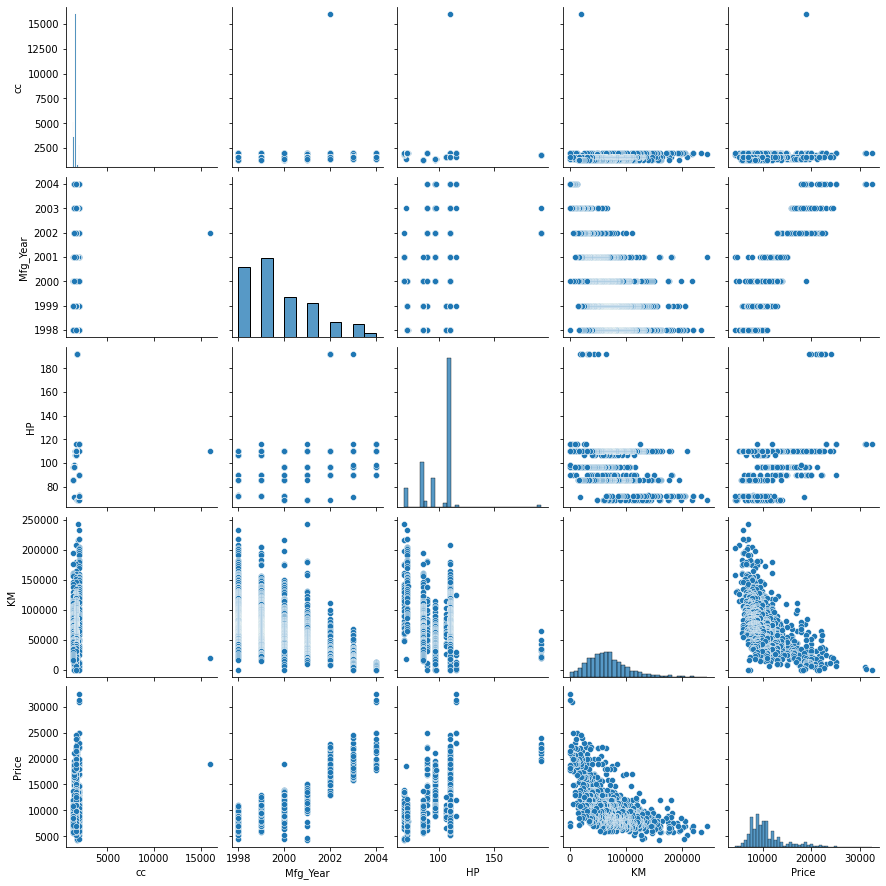

In [10]:
""" pairplot을 통한 각 변수 간 관계성 파악 """

"""
cc, Mfg_Year, HP, KM, Price 변수들에 대해서만 시각화
"""

sns.pairplot(data[['cc', 'Mfg_Year', 'HP', 'KM', 'Price']])
plt.show()

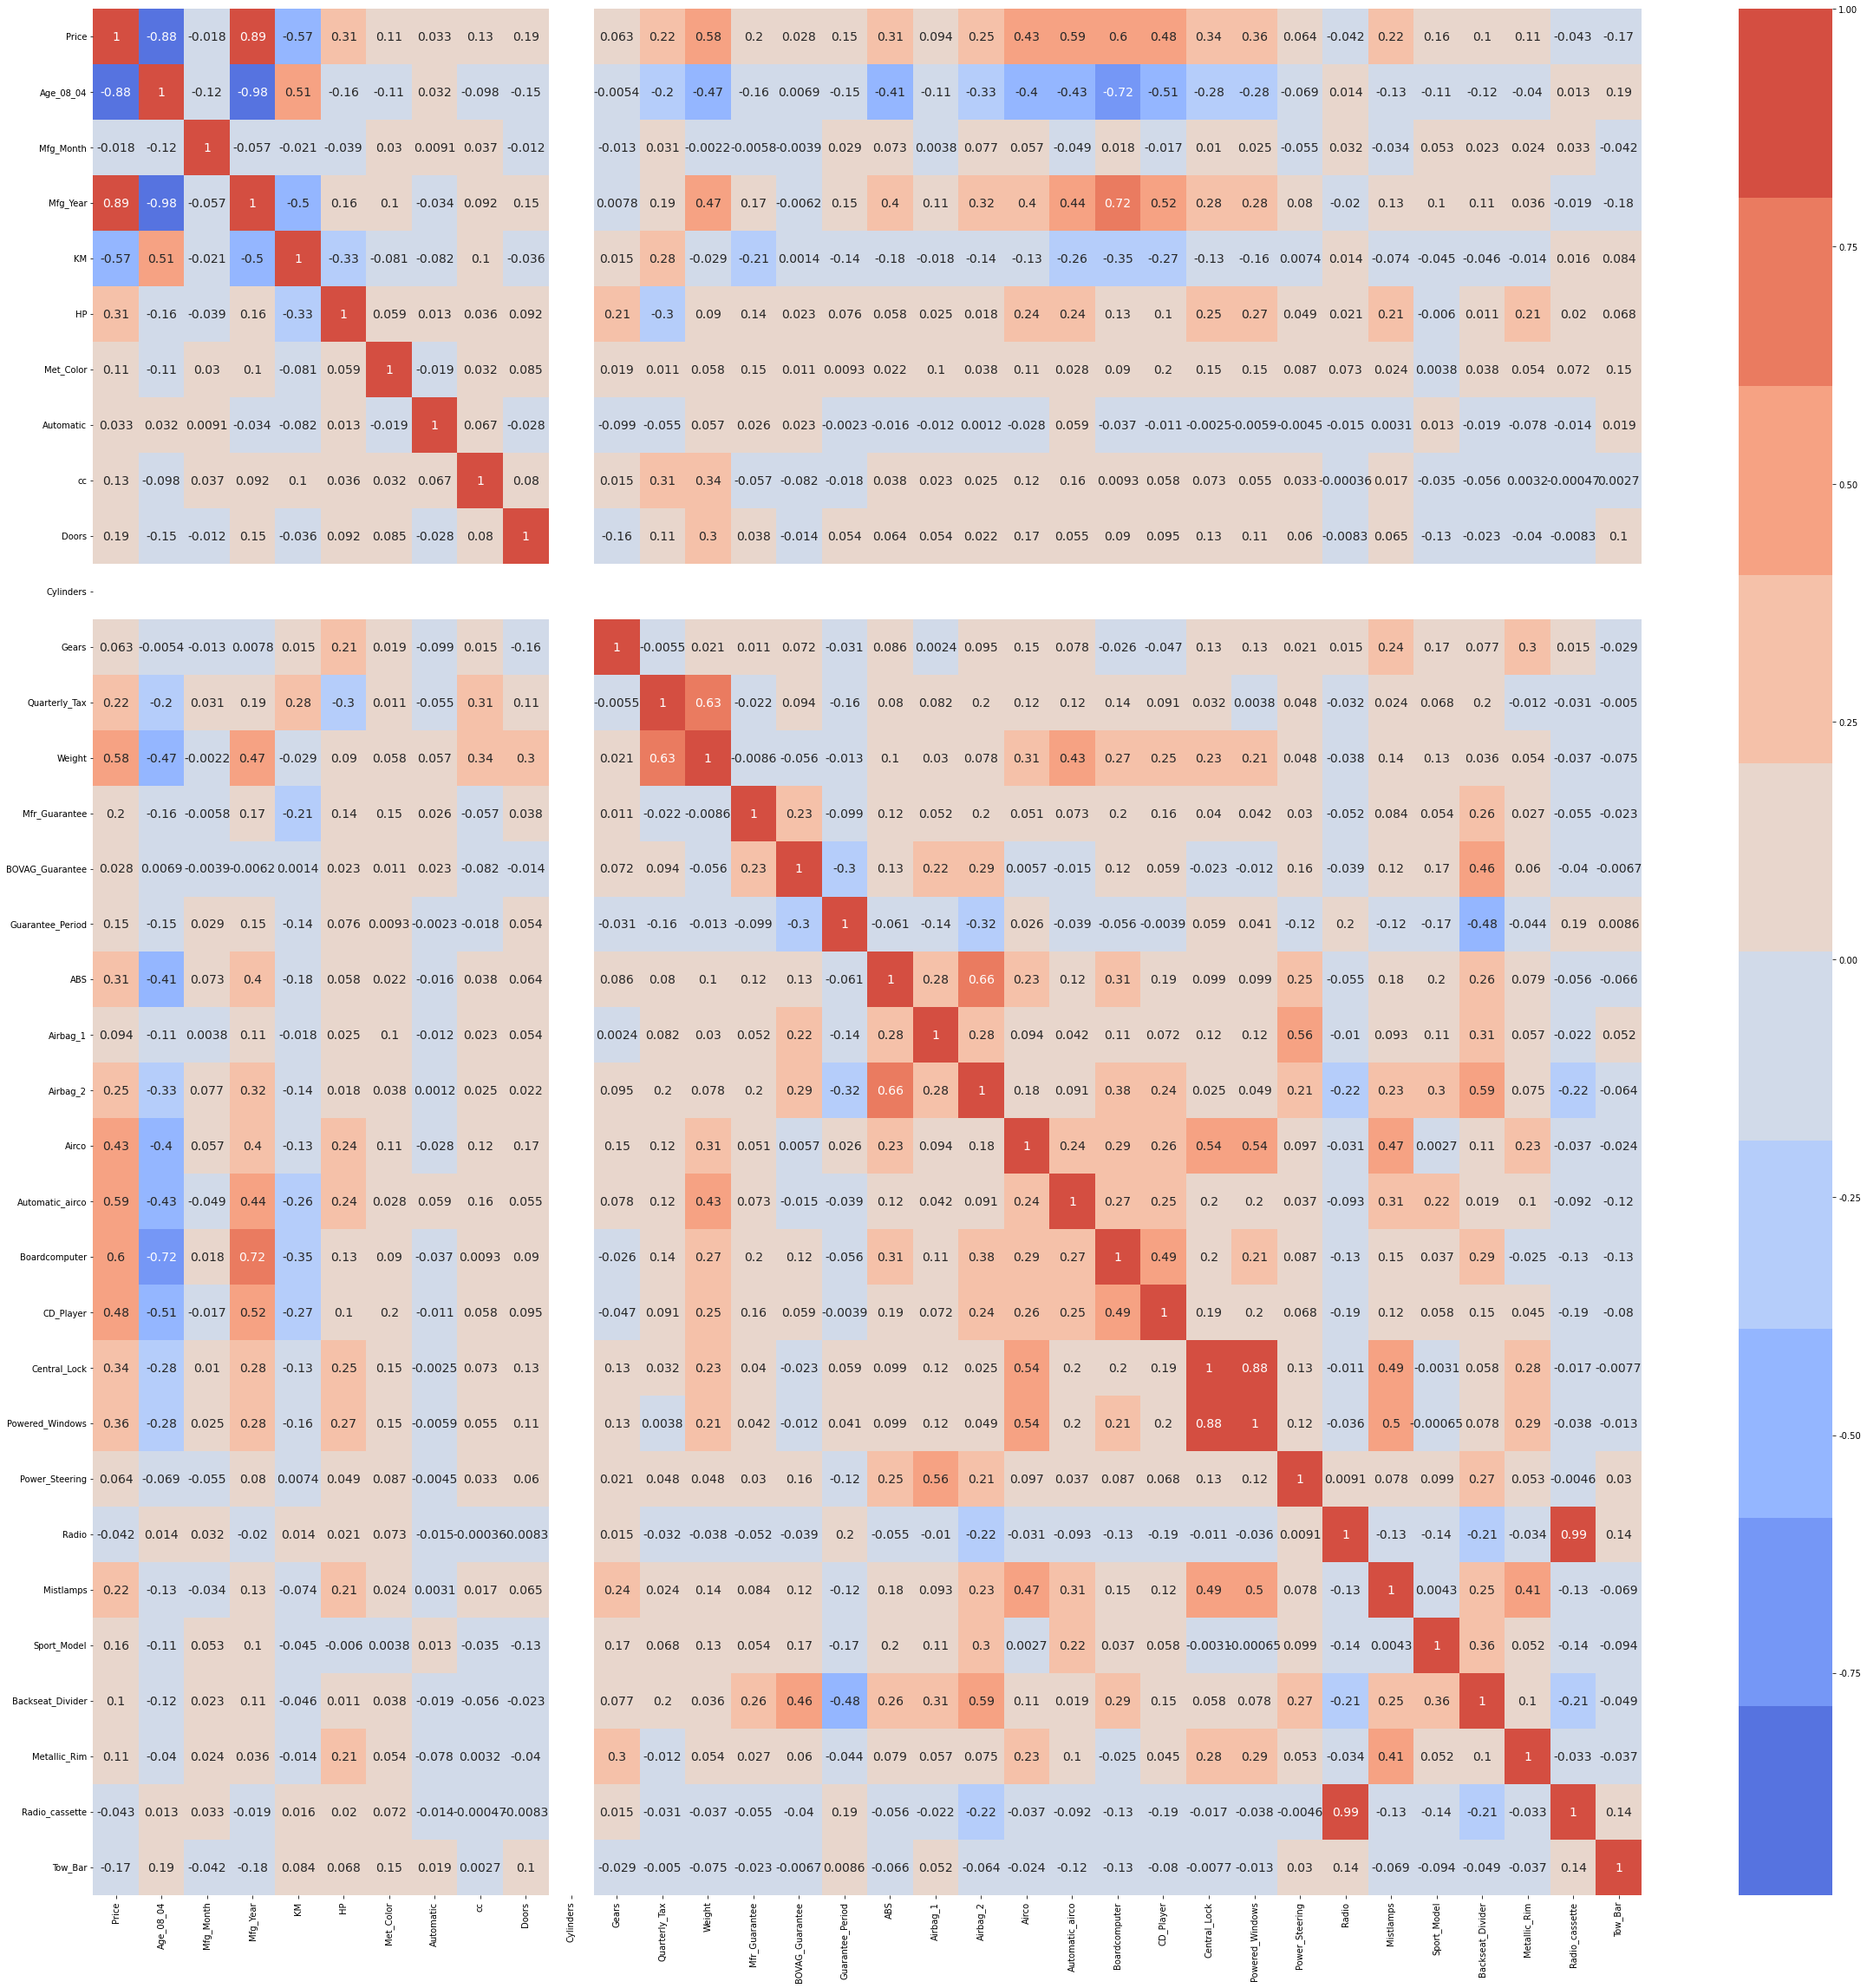

In [43]:
""" 상관관계 히트맵을 통한 변수 간 상관관계 분석 """

"""
Figure 크기: 높이 및 너비 모두 40
annotation을 상관관계 값으로 표기할 것
annotation 폰트 크기: 14
"""

plt.figure(figsize=(40, 40))
sns.heatmap(
    data.corr(), 
    cmap=sns.color_palette("coolwarm", 10), 
    annot=data.corr(),
    annot_kws={"size": 14}
    ) 
plt.show()

## **2. 데이터 분할**

In [14]:
""" 예측에 필요하지 않은 변수 제거 """

"""
불필요 변수: Id, Model, Fuel_Type
"""

data = data.drop(['Id', 'Model', 'Fuel_Type'], axis=1)
data.head()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,13500,23,10,2002,46986,90,1,0,2000,3,...,1,1,1,0,0,0,1,0,0,0
1,13750,23,10,2002,72937,90,1,0,2000,3,...,1,0,1,0,0,0,1,0,0,0
2,13950,24,9,2002,41711,90,1,0,2000,3,...,0,0,1,0,0,0,1,0,0,0
3,14950,26,7,2002,48000,90,0,0,2000,3,...,0,0,1,0,0,0,1,0,0,0
4,13750,30,3,2002,38500,90,0,0,2000,3,...,1,1,1,0,1,0,1,0,0,0


In [16]:
""" 학습데이터와 평가데이터 분할"""

"""
X, y변수 구분
  - X: 전체 데이터에서 Price 변수를 제외한 모든 변수
  - Y: Price 변수
학습데이터:평가데이터 = 7:3으로 나눌 것
random_state: 216
"""

X = data.drop('Price', axis=1)
y = data[['Price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                test_size=0.3, 
                                                random_state=216)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1005, 33), (431, 33), (1005, 1), (431, 1))

## **3. 모델링**

#### **3-1. 모델 학습 (파라미터 도출)**
 - 이때, statsmodels 패키지를 활용하여 회귀모형을 적합

In [17]:
""" 회귀분석을 위한 상수항 추가 """
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [18]:
""" 회귀모형 파라미터 도출 """
lm = sm.OLS(y_train, X_train)
lm_trained = lm.fit()

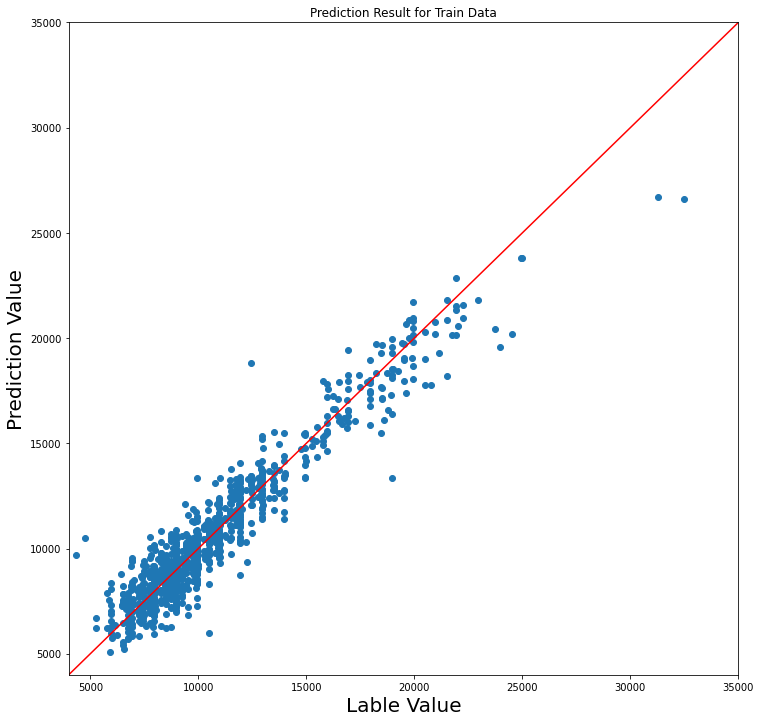

In [21]:
""" train 데이터의 예측 결과 비교 """

"""
1. Figure 크기는 너비 및 높이 모두 12로 지정
 - X축: 실제값
 - Y축: 예측값
2. y=x 그래프를 그릴 것 (범위: [4000, 35000] / 색깔: 빨간색)
3. Figure 제목 및 축 제목 지정
 - Figure 제목: Prediction Result for Train Data
 - X축: Lable Value (폰트크기: 20)
 - Y축: Prediction Value (폰트크기: 20)
4. Figure에 시각화 할 X축 및 Y축 범위를 모두 [4000, 35000]로 지정
"""

y_train_pred = lm_trained.fittedvalues 

plt.figure(figsize=(12, 12)) 

plt.scatter(y_train, y_train_pred) 
plt.plot([4000, 35000], [4000, 35000], c='red') 

plt.title('Prediction Result for Train Data') 
plt.xlabel('Lable Value', size=20) 
plt.ylabel('Prediction Value', size=20) 

plt.xlim(4000, 35000) 
plt.ylim(4000, 35000) 

plt.show()

#### **3-2. 선형회귀 모델의 가정 충족여부 확인**

In [22]:
""" 오차 값 확인 """
model_residuals = lm_trained.resid
model_residuals

1001    -771.811134
637       47.894343
876      198.709857
869     1060.603074
475     -766.145905
           ...     
971     1127.304957
709     -550.087401
791     -701.105059
1234    1727.959177
1264    -138.841069
Length: 1005, dtype: float64

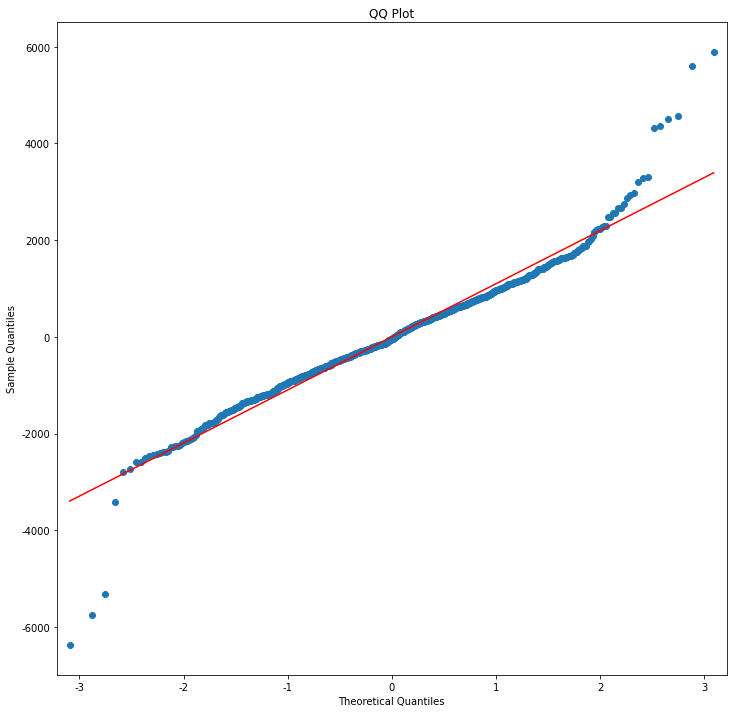

In [23]:
""" 오차의 정규성 확인 """

"""
QQ-plot으로 오차의 정규성 분석
 - 이미지 너비 및 높이: 12
 - Figure Title: QQ Plot
 - 표준정규분포선 표시
"""

plt.rcParams['axes.unicode_minus'] = False ### 음수 폰트 깨짐 방지

fig, ax = plt.subplots(1, 1) 
fig.set_figheight(12) 
fig.set_figwidth(12) 

sm.ProbPlot(model_residuals).qqplot(line='s', 
                                    color='#1f77b4', 
                                    ax=ax) 
ax.title.set_text('QQ Plot') 

[Text(0.5, 0, 'Fitted values'), Text(0, 0.5, 'Residuals')]

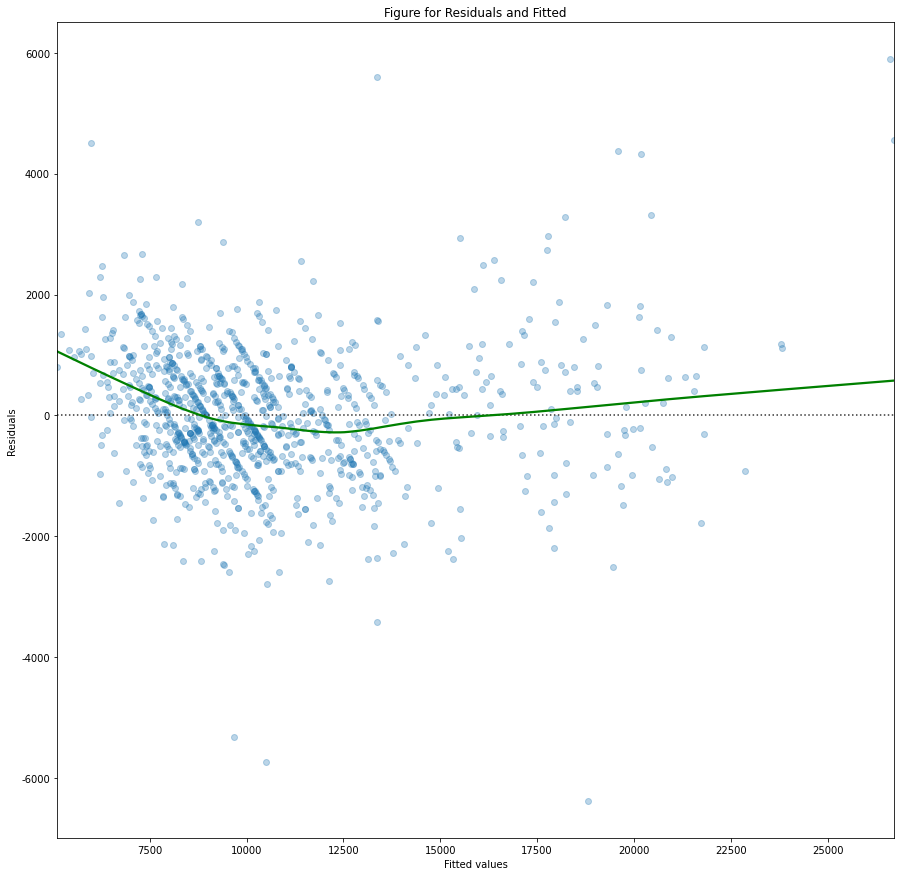

In [24]:
""" 오차의 등분산성 확인 """

"""
residual plot으로 오차의 등분산성 확인
 - 이미지 너비 및 높이: 15
 - 추세선 표시
 - 투명도: 0.3
 - 추세선 색깔: Green
 - Figure 제목: Figure for Residuals and Fitted
 - x축 제목: Fitted values
 - y축 제목: Residuals
"""

model_fitted_y= lm_trained.fittedvalues

fig, ax = plt.subplots(1, 1)
fig.set_figheight(15)
fig.set_figwidth(15)

sns.residplot(x=model_fitted_y, 
              y=y_train, 
              lowess=True, 
              scatter_kws={'alpha': 0.3}, 
              line_kws={'color':'green'}, 
              ax=ax)
ax.title.set_text('Figure for Residuals and Fitted')
ax.set(xlabel='Fitted values', ylabel='Residuals')

#### **3-3. 모델 평가 및 결과해석**

In [25]:
""" 모델 결과 해석 """
lm_trained.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     309.6
Date:                Thu, 15 Feb 2024   Prob (F-statistic):               0.00
Time:                        13:41:02   Log-Likelihood:                -8462.2
No. Observations:                1005   AIC:                         1.699e+04
Df Residuals:                     973   BIC:                         1.715e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Age_08_04         -119.2370      4.239    -28.127      0.000    -127.556    -110.918
Mfg_Month         -102.8131     10.966     -9.375      0.000    -124.333     -81.293
Mfg_Year             2.1866      0.788      2.773      0.006       0.639       3.734
KM                  -0.0202      0.001    -15.412      0.000      -0.023      -0.018
HP                  19.5123      3.036      6.428      0.000      13.555      25.469
Met_Color          -60.3435     80.845     -0.746      0.456    -218.994      98.307
Automatic          415.1953    156.961      2.645      0.008     107.174     723.217
cc                  -0.0403      0.078     -0.517      0.606      -0.193       0.113
Doors              110.1887     41.458      2.658      0.008      28.831     191.546
Cylinders           -0.0326      0.002    -14.486      0.000      -0.037      -0.028
Gears              298.9532    206.910      1.445      0.149    -107.089     704.995
Quarterly_Tax        8.9329      1.392      6.417      0.000       6.201      11.665
Weight               8.8791      1.144      7.761      0.000       6.634      11.124
Mfr_Guarantee      294.7569     79.025      3.730      0.000     139.678     449.836
BOVAG_Guarantee    495.1656    131.273      3.772      0.000     237.554     752.777
Guarantee_Period    66.4990     14.365      4.629      0.000      38.310      94.688
ABS               -325.7193    131.484     -2.477      0.013    -583.745     -67.694
Airbag_1           162.4514    254.815      0.638      0.524    -337.599     662.502
Airbag_2           -80.7544    135.701     -0.595      0.552    -347.054     185.545
Airco               85.2538     96.704      0.882      0.378    -104.518     275.025
Automatic_airco   2239.4325    196.703     11.385      0.000    1853.422    2625.443
Boardcomputer     -245.1194    128.588     -1.906      0.057    -497.462       7.223
CD_Player          194.8504    106.497      1.830      0.068     -14.140     403.841
Central_Lock        78.8792    157.207      0.502      0.616    -229.624     387.383
Powered_Windows    337.2446    156.944      2.149      0.032      29.257     645.232
Power_Steering    -100.1137    293.804     -0.341      0.733    -676.677     476.449
Radio             -759.3867    815.915     -0.931      0.352   -2360.542     841.769
Mistlamps           41.5855    115.851      0.359      0.720    -185.761     268.932
Sport_Model        449.1411     93.673      4.795      0.000     265.317     632.965
Backseat_Divider  -309.5280    129.229     -2.395      0.017    -563.128     -55.928
Metallic_Rim       202.6631    102.176      1.983      0.048       2.152     403.174
Radio_cassette     785.3394    817.642      0.960      0.337    -819.205    2389.884
Tow_Bar           -162.8919     85.554     -1.904      0.057    -330.783       4.999
=======================

In [26]:
""" 모델 1차 성능 평가 (train data) """

"""
평가척도: MSE, RMSE, MAE, MAPE, R2
"""

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

train_pred = lm_trained.predict(X_train)

print('Training MSE: {:.3f}'.format(mean_squared_error(y_train, train_pred)))
print('Training RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(y_train, train_pred))))
print('Training MAE: {:.3f}'.format(mean_absolute_error(y_train, train_pred)))
print('Training MAPE: {:.3f}'.format(mean_absolute_percentage_error(y_train, train_pred)))
print('Training R2: {:.3f}'.format(r2_score(y_train, train_pred)))

Training MSE: 1205518.010
Training RMSE: 1097.961
Training MAE: 819.399
Training MAPE: 33.943
Training R2: 0.908


In [27]:
""" 모델 1차 성능 평가 (test data) """

"""
평가척도: MSE, RMSE, MAE, MAPE, R2
"""

test_pred = lm_trained.predict(X_test)

print('Testing MSE: {:.3f}'.format(mean_squared_error(y_test, test_pred)))
print('Testing RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(y_test, test_pred))))
print('Testing MAE: {:.3f}'.format(mean_absolute_error(y_test, test_pred)))
print('Testing MAPE: {:.3f}'.format(mean_absolute_percentage_error(y_test, test_pred)))
print('Testing R2: {:.3f}'.format(r2_score(y_test, test_pred)))

Testing MSE: 1393476.217
Testing RMSE: 1180.456
Testing MAE: 864.495
Testing MAPE: 34.983
Testing R2: 0.895


In [30]:
""" 유의미하지 않은 변수 제거 후, 다시 모델링 """

"""
유의수준 기준: 0.05
"""

not_significants = ['Met_Color', 'cc', 'Gears', 'Airbag_1', 'Airbag_2', 'Airco',
       'Boardcomputer', 'CD_Player', 'Central_Lock', 'Power_Steering', 'Radio',
       'Mistlamps', 'Radio_cassette', 'Tow_Bar']
# not_significants = lm_trained.pvalues.index[lm_trained.pvalues > 0.05] ### solution2: 눈으로 일일이 식별하지 않고 쉽게 제거 가능
print(f'유의미하지 않은 변수들: {not_significants}')

X_train_new = X_train.drop(not_significants, axis=1)
X_test_new = X_test.drop(not_significants, axis=1)

유의미하지 않은 변수들: ['Met_Color', 'cc', 'Gears', 'Airbag_1', 'Airbag_2', 'Airco', 'Boardcomputer', 'CD_Player', 'Central_Lock', 'Power_Steering', 'Radio', 'Mistlamps', 'Radio_cassette', 'Tow_Bar']


In [31]:
""" 변수 제거 후, 모델 학습 결과 다시 확인 """
lm_new = sm.OLS(y_train, X_train_new)
lm_new_trained = lm_new.fit()
lm_new_trained.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     562.5
Date:                Thu, 15 Feb 2024   Prob (F-statistic):               0.00
Time:                        13:41:59   Log-Likelihood:                -8470.4
No. Observations:                1005   AIC:                         1.698e+04
Df Residuals:                     987   BIC:                         1.707e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Age_08_04         -117.0775      3.047    -38.425      0.000    -123.057    -111.098
Mfg_Month         -102.5299     10.785     -9.507      0.000    -123.693     -81.366
Mfg_Year             2.6365      0.578      4.560      0.000       1.502       3.771
KM                  -0.0203      0.001    -15.725      0.000      -0.023      -0.018
HP                  18.8058      2.910      6.462      0.000      13.095      24.516
Automatic          379.3450    155.112      2.446      0.015      74.958     683.732
Doors               92.4062     40.273      2.295      0.022      13.376     171.436
Cylinders           -0.0313      0.002    -15.730      0.000      -0.035      -0.027
Quarterly_Tax        8.4220      1.347      6.252      0.000       5.779      11.065
Weight               9.3642      1.117      8.387      0.000       7.173      11.555
Mfr_Guarantee      279.7887     78.036      3.585      0.000     126.652     432.925
BOVAG_Guarantee    501.7635    128.639      3.901      0.000     249.325     754.202
Guarantee_Period    70.2919     13.892      5.060      0.000      43.030      97.554
ABS               -343.0428    104.121     -3.295      0.001    -547.367    -138.718
Automatic_airco   2290.2142    184.593     12.407      0.000    1927.974    2652.454
Powered_Windows    462.9808     79.040      5.858      0.000     307.875     618.086
Sport_Model        488.7866     88.740      5.508      0.000     314.645     662.928
Backseat_Divider  -346.7725    113.146     -3.065      0.002    -568.808    -124.737
Metallic_Rim       287.4316     95.162      3.020      0.003     100.689     474.174
==============================================================================
Omnibus:                       98.984   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              643.167
Skew:                           0.119   Prob(JB):                    2.18e-140
Kurtosis:                       6.912   Cond. No.                     2.91e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.34e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [34]:
""" 모델 2차 성능 평가 (train data) """

"""
평가척도: MSE, RMSE, MAE, MAPE, R2
"""

train_pred_new = lm_new_trained.predict(X_train_new)

print('Training MSE: {:.3f}'.format(mean_squared_error(y_train, train_pred_new)))
print('Training RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(y_train, train_pred_new))))
print('Training MAE: {:.3f}'.format(mean_absolute_error(y_train, train_pred_new)))
print('Training MAPE: {:.3f}'.format(mean_absolute_percentage_error(y_train, train_pred_new)))
print('Training R2: {:.3f}'.format(r2_score(y_train, train_pred_new)))

Training MSE: 1225192.355
Training RMSE: 1106.884
Training MAE: 823.427
Training MAPE: 33.922
Training R2: 0.906


In [36]:
""" 모델 2차 성능 평가 (test data) """

"""
평가척도: MSE, RMSE, MAE, MAPE, R2
"""

test_pred_new = lm_new_trained.predict(X_test_new)

print('Testing MSE: {:.3f}'.format(mean_squared_error(y_test, test_pred_new)))
print('Testing RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(y_test, test_pred_new))))
print('Testing MAE: {:.3f}'.format(mean_absolute_error(y_test, test_pred_new)))
print('Testing MAPE: {:.3f}'.format(mean_absolute_percentage_error(y_test, test_pred_new)))
print('Testing R2: {:.3f}'.format(r2_score(y_test, test_pred_new)))

Testing MSE: 1408106.597
Testing RMSE: 1186.637
Testing MAE: 871.527
Testing MAPE: 34.870
Testing R2: 0.894


## **Appendix. sklearn을 활용한 선형회귀모형 구축**

In [37]:
""" sklearn으로 모델 학습 및 예측 """

"""
sklearn의 LinearRegression함수 활용하여 예측값까지 산출
 - 모델 내 상수항은 활용하지 않을 것
"""

lr_skl = LinearRegression(fit_intercept=False) 
lr_skl.fit(X_train, y_train) 
y_pred_skl = lr_skl.predict(X_test) 


In [38]:
""" sklearn을 통한 회귀계수 확인"""
lr_skl.coef_

array([[-1.59479390e+07, -1.59479226e+07, -1.91373835e+08,
        -2.02384415e-02,  1.95122873e+01, -6.03435200e+01,
         4.15195430e+02, -4.03193736e-02,  1.10188663e+02,
         9.59141751e+10,  2.98953120e+02,  8.93292871e+00,
         8.87911417e+00,  2.94756899e+02,  4.95165634e+02,
         6.64989682e+01, -3.25719326e+02,  1.62451425e+02,
        -8.07543827e+01,  8.52538622e+01,  2.23943239e+03,
        -2.45119455e+02,  1.94850401e+02,  7.88791804e+01,
         3.37244626e+02, -1.00113695e+02, -7.59386672e+02,
         4.15855186e+01,  4.49141164e+02, -3.09528030e+02,
         2.02663082e+02,  7.85339359e+02, -1.62891880e+02]])

In [39]:
""" sklearn 예측 결과 확인 """

"""
평가척도: MSE, RMSE, MAE, MAPE, R2
"""

test_mse_skl = mean_squared_error(y_test, y_pred_skl)
test_rmse_skl = np.sqrt(mean_squared_error(y_test, y_pred_skl))
test_mae_skl = mean_absolute_error(y_test, y_pred_skl)
test_mape_skl = mean_absolute_percentage_error(y_test, y_pred_skl)
test_r2_skl = r2_score(y_test, y_pred_skl)

print('sklearn Testing MSE: {:.3f}'.format(test_mse_skl))
print('sklearn Testing RMSE: {:.3f}'.format(test_rmse_skl))
print('sklearn Testing MAE: {:.3f}'.format(test_mae_skl))
print('sklearn Testing MAPE: {:.3f}'.format(test_mape_skl))
print('sklearn Testing R2: {:.3f}'.format(test_r2_skl))

sklearn Testing MSE: 1393476.178
sklearn Testing RMSE: 1180.456
sklearn Testing MAE: 864.495
sklearn Testing MAPE: 8.677
sklearn Testing R2: 0.895
